In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from PIL import ImageDraw
sys.path.append('..')
from utilitaire.imgAiTrainer.imgAiTrainer import Trainer

tr = Trainer()

In [2]:
def listImg(nb,x,y):
    lImg = []
    lLabel = []
    for i in range(nb):
        cercleT = tr.createCercle((x,y),True)
        img = Image.open("../../Assets/imgAiTrainer/cercle.png")
        imgGray = tf.keras.preprocessing.image.img_to_array(img, data_format=None, dtype=None)
        lImg.append(imgGray)
        lLabel.append((cercleT[0][0],cercleT[0][1],cercleT[1],cercleT[2]))
    lImg = np.array(lImg)
    lLabel = np.array(lLabel)
    return lImg, lLabel


In [3]:
def show_sample(img):
  figure, axis = plt.subplots(1,1)
  axis.imshow(img)


In [4]:
def show_sample2(img,img2):
  figure, (axis1, axis2) = plt.subplots(1,2)
  axis1.imshow(img)
  axis2.imshow(img2)

In [5]:
img_shape = (600,800,3)

In [6]:
#l2 = None
#inputs = keras.Input(shape=img_shape)
#conv1 = keras.layers.Conv2D(16,5,padding='same',activation='relu',kernel_initializer='glorot_normal',kernel_regularizer=l2)(inputs)
#conv1 = keras.layers.BatchNormalization(momentum=0.99)(conv1)
#conv2 = keras.layers.Conv2D(32,5,padding='same',activation='relu',kernel_initializer='glorot_normal',kernel_regularizer=l2)(conv1)
#conv2 = keras.layers.BatchNormalization(momentum=0.99)(conv2)
#outputs = keras.layers.Conv2D(1,5,padding='same',activation='relu',kernel_initializer='glorot_normal',kernel_regularizer=l2)(conv2)

model = keras.models.Sequential()
model.add(keras.layers.Convolution2D(32, 5, 5, padding='same',  activation='relu', input_shape=img_shape))
model.add(keras.layers.Convolution2D(64, 5, 5, padding='same',  activation='relu'))
model.add(keras.layers.Convolution2D(128, 5, 5, padding='same',  activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(4, activation='linear'))

model.summary()

opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 160, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 32, 64)        51264     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 7, 128)         204928    
_________________________________________________________________
flatten (Flatten)            (None, 4480)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               448100    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 404       
Total params: 707,128
Trainable params: 707,128
Non-trainable params: 0
__________________________________________________

In [7]:
limg , lLabel = listImg(1000,800,600)
limg.shape

(1000, 600, 800, 3)

In [89]:
history = model.fit(limg, lLabel,batch_size=100, epochs=10, verbose=1)
print("Finished training the model")

Epoch 1/10
10/10 [==============================] - 9s 866ms/step - loss: 187.0496
Epoch 2/10
10/10 [==============================] - 8s 845ms/step - loss: 167.3926
Epoch 3/10
10/10 [==============================] - 9s 850ms/step - loss: 159.1601
Epoch 4/10
10/10 [==============================] - 9s 898ms/step - loss: 126.2590
Epoch 5/10
10/10 [==============================] - 8s 804ms/step - loss: 113.4273
Epoch 6/10
10/10 [==============================] - 8s 834ms/step - loss: 96.2974
Epoch 7/10
10/10 [==============================] - 8s 834ms/step - loss: 89.3495
Epoch 8/10
10/10 [==============================] - 9s 915ms/step - loss: 83.6508
Epoch 9/10
10/10 [==============================] - 9s 858ms/step - loss: 76.4584
Epoch 10/10
10/10 [==============================] - 8s 806ms/step - loss: 66.9697
Finished training the model


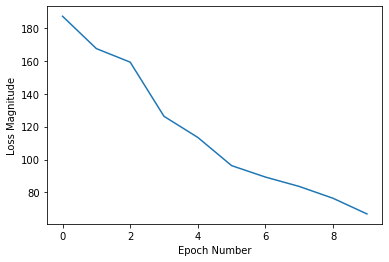

In [90]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [8]:
model.load_weights('save/model')

(1, 600, 800, 3)

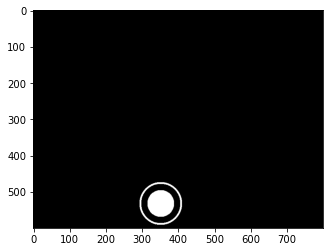

In [13]:
cercleT = tr.createCercle((800,600),True)

imgGray = tf.keras.preprocessing.image.load_img("../../Assets/imgAiTrainer/cercle.png")
show_sample(imgGray)
imgGrayIa = np.expand_dims(imgGray, axis=0)
imgGrayIa.shape

In [14]:
%%time
y_pred = model.predict(imgGrayIa)

Wall time: 51.9 ms


In [15]:
print("Prédiction : ",y_pred)
print("Image : ",cercleT[0],cercleT[1],cercleT[2])

Prédiction :  [[354.30188  536.6421    50.71828   63.285652]]
Image :  (352.5, 532.5) 41.5 58.5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


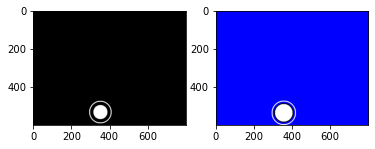

In [16]:
y_pred=y_pred[0]
img = Image.new('RGBA', (800,600),"blue" )
draw = ImageDraw.Draw(img)
draw.ellipse([round(y_pred[0]-y_pred[2]),round(y_pred[1]-y_pred[2]),round(y_pred[0]+y_pred[2]),round(y_pred[1]+y_pred[2])], fill = 'white', outline ='black', width=5)
draw.ellipse([round(y_pred[0]-y_pred[3]),round(y_pred[1]-y_pred[3]),round(y_pred[0]+y_pred[3]),round(y_pred[1]+y_pred[3])], fill = None, outline ='white', width=5)
imgGrayPre = tf.keras.preprocessing.image.img_to_array(img, data_format=None, dtype=None)
show_sample2(imgGray,imgGrayPre)